## Visualize Genome

In [6]:
import genome_helpers as gh
import numpy as np
import pandas as pd

In [8]:
staph_url = ["http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/genome1.fa",
            "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/genome2.fa",
           "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/genome3.fa",
            "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/genome4.fa",
            "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/genome5.fa"]
staph_annot = ["http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/annotation1.fa",
              "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/annotation2.fa",
              "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/annotation3.fa",
               "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/annotation4.fa",
               "http://users-birc.au.dk/cstorm/courses/MLiB_f14/projects/project3/annotation5.fa"]

In [46]:
d = {'A':[],'C':[],'T':[],'G':[]}
for i,char in enumerate(data):
    d[char].append(i)
# y = [1]*len(d['A'])
# plt.scatter(d['A'],y,color='red',alpha=0.1,s=.1)
# plt.scatter(d['C'],[1]*len(d['C']),color='green',alpha=0.1,s=.1)
# plt.scatter(d['T'],[1]*len(d['T']),color='yellow',alpha=0.1,s=.1)
# plt.scatter(d['G'],[1]*len(d['G']),color='blue',alpha=0.1,s=.1)
# plt.show()    

In [48]:
from matplotlib import pyplot as plt
from matplotlib.collections import BrokenBarHCollection
%matplotlib inline

def find_regions_df(annot,data):
    region = gh.find_regions(annot,data)
    regions = pd.DataFrame(region)
    regions.columns = [["state","start","end","seq"]]
#     print("Built table of sequences for each state in genome...")
    return regions

def plot_genome_input_data(regions,data):
    colors = {'N':(1,0,0),'C':(0,0,1),'R':(0,1,0)}
    df = pd.DataFrame()
    df['start'] = regions.start / len(data)
    df['width'] = (regions.end - regions.start) / len(data)
    df['color'] = regions.state.apply(lambda x: colors[x])
    df['xrange'] = df.apply(lambda x: (x[0],x[1]),axis=1)
    xranges = list(df.xrange)
    colors = list(df.color)
    return [xranges, colors]

def plot_genome(xranges,colors):
    yrange = (0,1)
    coll = BrokenBarHCollection(xranges, yrange, facecolors=colors)
    ax.add_axes
    fig, ax = plt.subplots(figsize=(200, 10), dpi=100)
    ax.add_collection(coll)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    

In [2]:
## load all Data
def all_data(staph_url,staph_annot):
    d = {}
    for i in range(len(staph_url)):
        title, genome = gh.load_file2(staph_url[i])
        _, annot = gh.load_file2(staph_annot[i])
        d[i] = [gh.load_file(staph_url[i]),gh.load_file(staph_annot[i]),title]
        print(title)
    return d

In [4]:
d = all_data(staph_url,staph_annot)

NC_002737.1 Streptococcus pyogenes M1 GAS, complete genome.
NC_004368.1 Streptococcus agalactiae NEM316, complete genome.
NC_004461.1 Staphylococcus epidermidis ATCC 12228, complete genome.
NC_006448.1 Streptococcus thermophilus LMG 18311, complete genome.
NC_007168.1 Staphylococcus haemolyticus JCSC1435, complete genome.


In [175]:
## Print all Data
def all_vis_by_frame(d):
    for i in d.keys():
        annot = d[i][1]
        genome = d[i][0]
        regions = find_regions_df(annot, genome)
        regions["frame"] = regions.start % 3
        xranges,colors = plot_genome_input_data(regions[regions.frame == 0][regions.state != 'N'],genome)
        plot_genome(xranges,colors)
        title = d[i][2]
        print(title)
        plt.show()
        
        xranges,colors = plot_genome_input_data(regions[regions.frame == 1][regions.state != 'N'],genome)
        plot_genome(xranges,colors)
        title = d[i][2]
        plt.show()
        
        xranges,colors = plot_genome_input_data(regions[regions.frame == 2][regions.state != 'N'],genome)
        plot_genome(xranges,colors)
        title = d[i][2]
        plt.show()

NC_002737.1 Streptococcus pyogenes M1 GAS, complete genome.


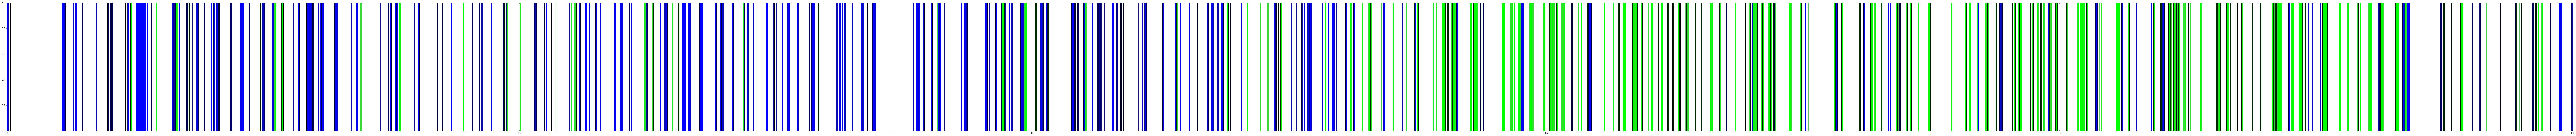

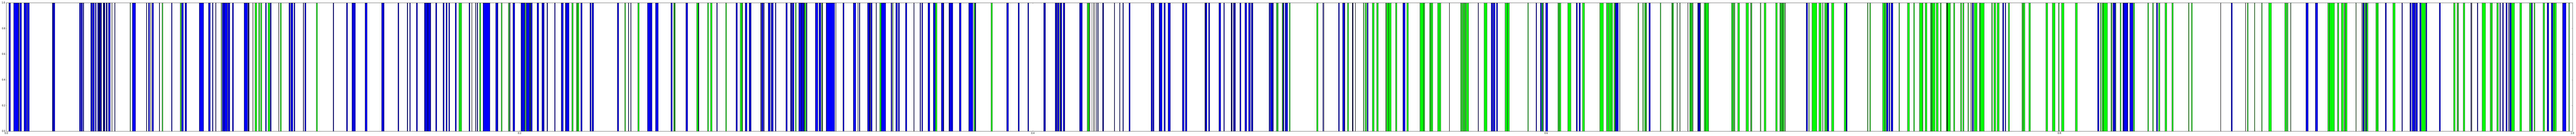

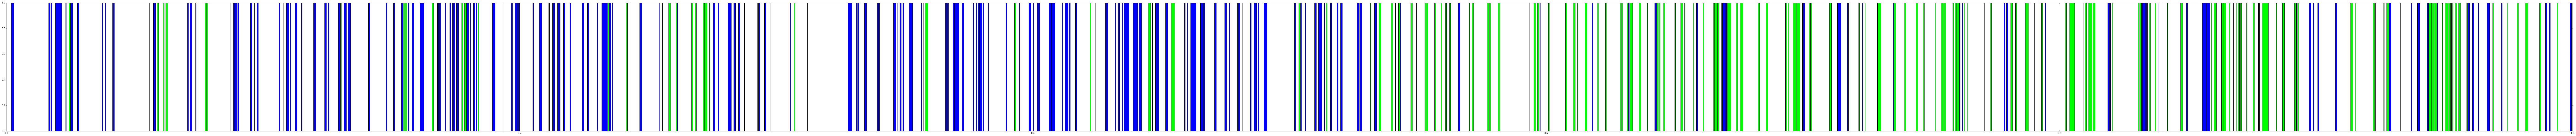

NC_004368.1 Streptococcus agalactiae NEM316, complete genome.


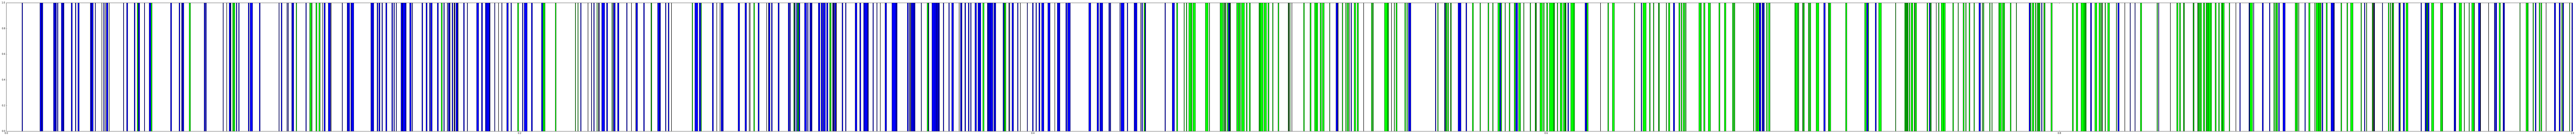

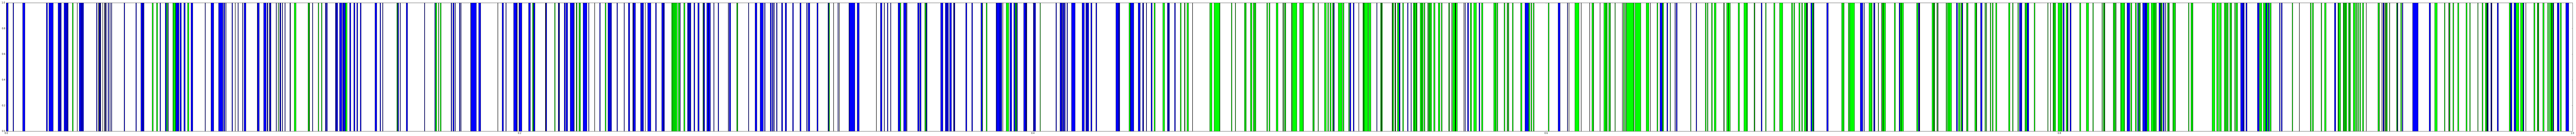

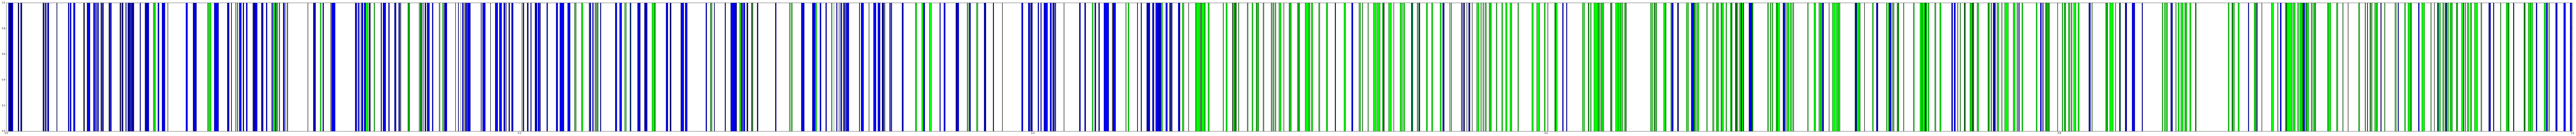

NC_004461.1 Staphylococcus epidermidis ATCC 12228, complete genome.


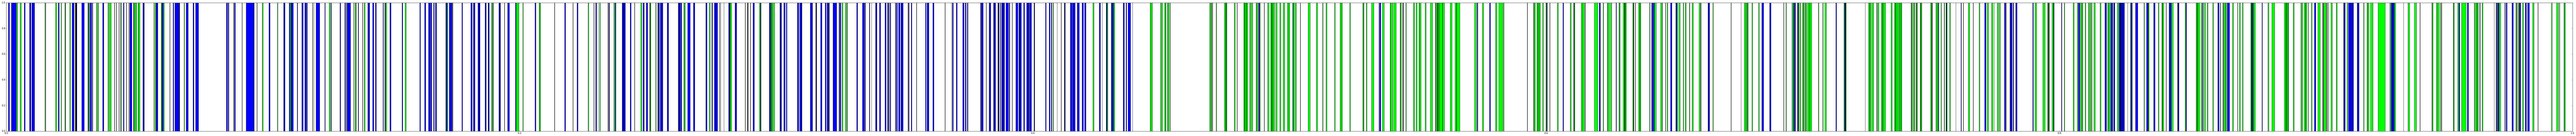

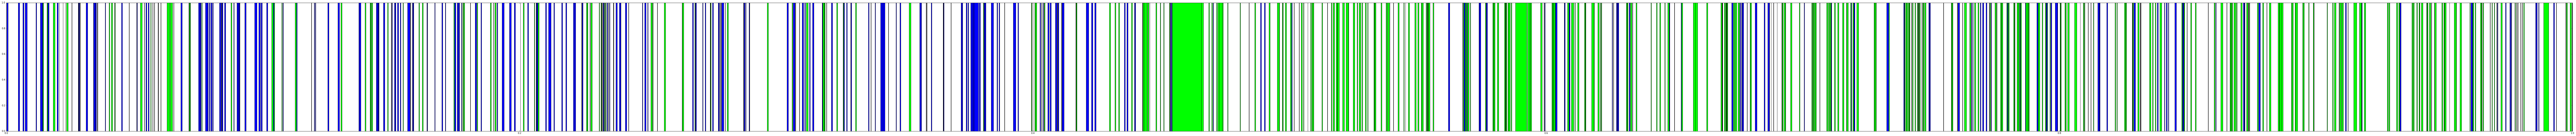

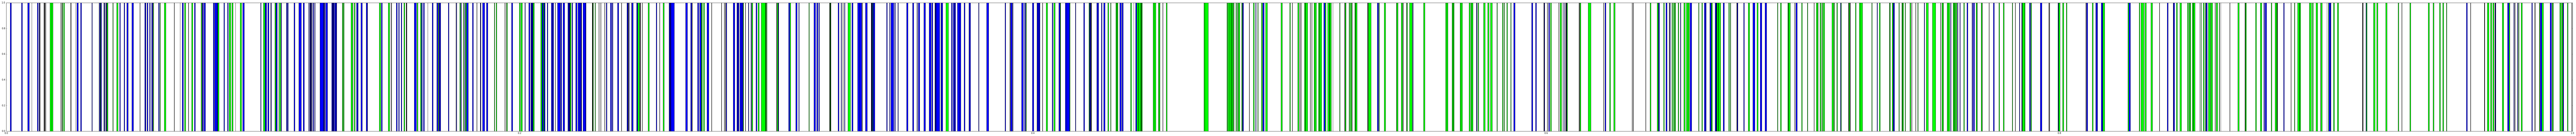

NC_006448.1 Streptococcus thermophilus LMG 18311, complete genome.


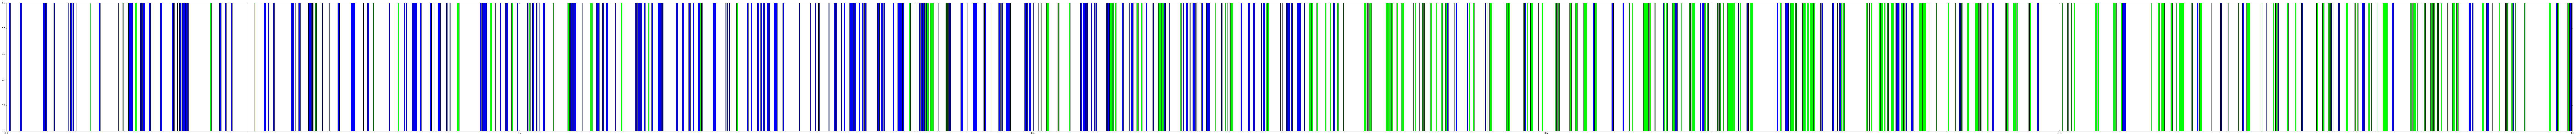

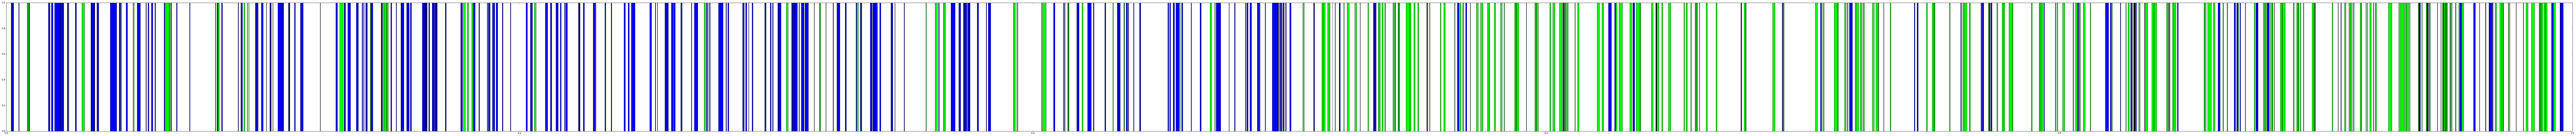

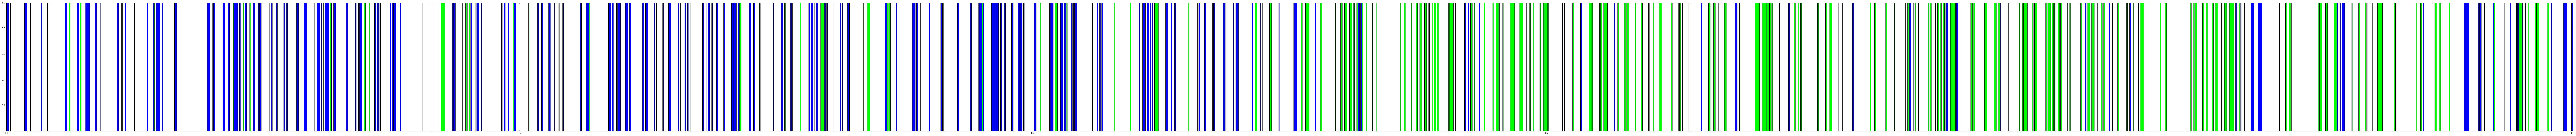

NC_007168.1 Staphylococcus haemolyticus JCSC1435, complete genome.


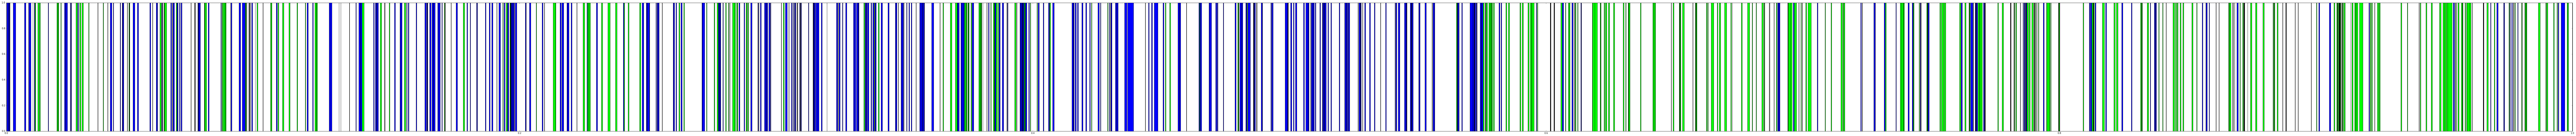

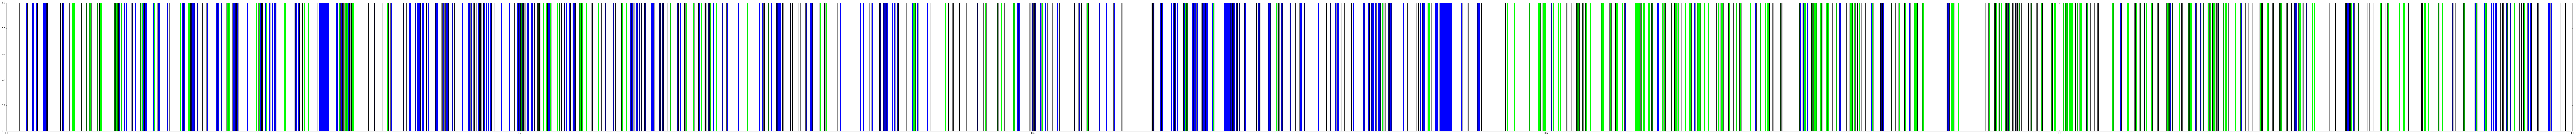

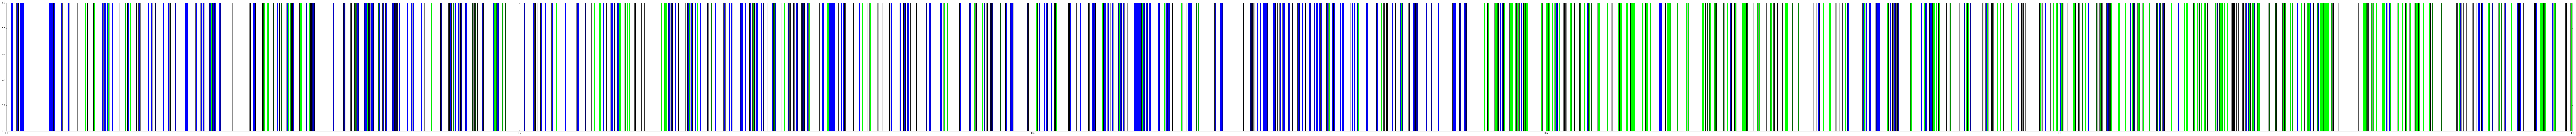

In [171]:
all_vis_by_frame(de)

In [165]:
## Print all Data
def all_vis(d):
    for i in d.keys():
        annot = d[i][1]
        genome = d[i][0]
        regions = find_regions_df(annot, genome)
#         regions["frame"] = regions.start % 3
        xranges,colors = plot_genome_input_data(regions,genome)
        plot_genome(xranges,colors)
        title = d[i][2]
        print(title)
        plt.show()
        

NC_002737.1 Streptococcus pyogenes M1 GAS, complete genome.


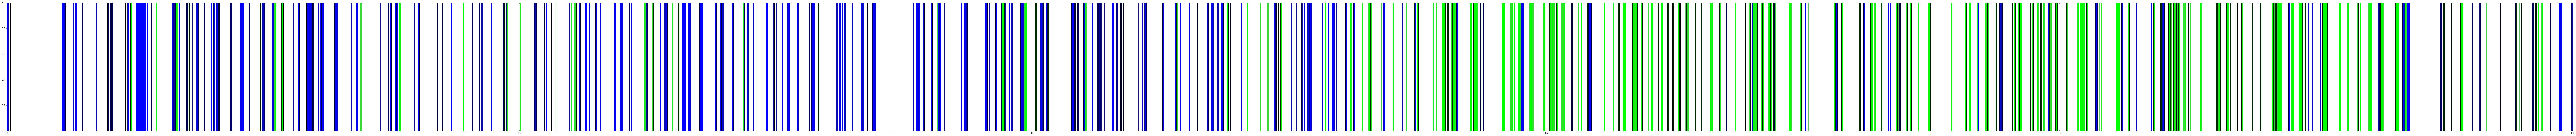

NC_002737.1 Streptococcus pyogenes M1 GAS, complete genome.


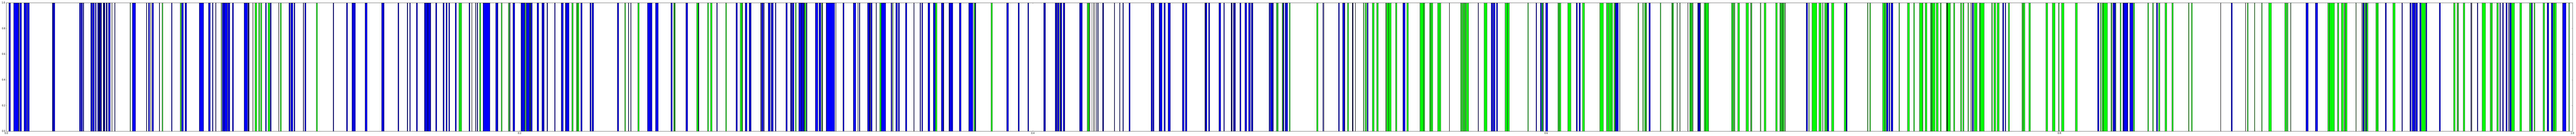

NC_002737.1 Streptococcus pyogenes M1 GAS, complete genome.


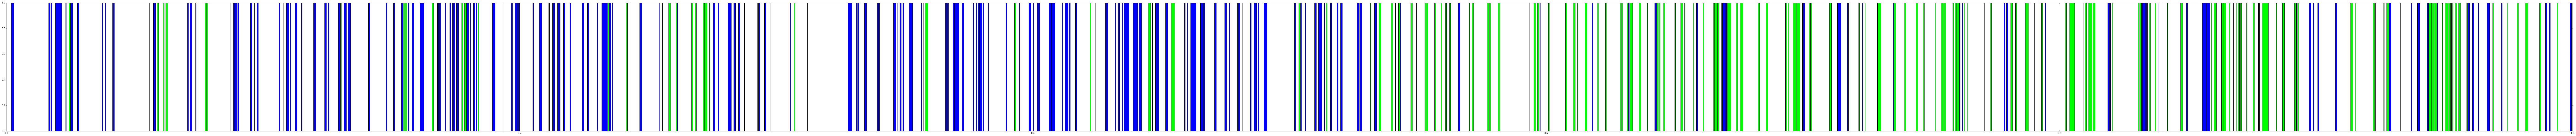

In [166]:
all_vis(de)

In [158]:
annot = de[0][1]
genome = de[0][0]
regions = find_regions_df(annot, genome)
len(regions)
regions["frame"] = regions.start % 3
regions

,state,start,end,seq,frame
0,N,0,231,TTGTTGATATTCTGTTTTTTCTTTTTTAGTTTTCCACATGAAAAAT...,0
1,C,231,1587,ATGACTGAAAATGAACAAATTTTTTGGAACAGGGTCTTGGAATTAG...,0
2,N,1587,1741,CATGTGGAAAAGAATATCTTTTATGAAATAGTTATCCACAAGTTGT...,0
3,C,1741,2878,ATGATTCAATTTTCAATTAATCGCACATTATTTATTCATGCTTTAA...,1
4,N,2878,2952,GTAAGAAAAAGCTCCCTTTTAGGAGTTTTTTTGTTATTATAAATAT...,1
5,C,2952,3150,ATGTATCAAATTGGATCATTTGTTGAAATGAAAAAACCTCATGCTT...,0
6,N,3150,3479,AAGTCCTTTTAAATAAATAATTCTAGCTATATTTGCAACCAATACT...,0
7,C,3479,4595,ATGGCTTTAACAGCAGGTATTGTAGGCTTACCAAATGTTGGTAAAT...,2
8,N,4595,4664,TTATATTAAAACAATATCAGAAGGTTGGAAGAACATTCCAGCCCTT...,2
9,C,4664,5234,ATGGTAAAAATGATTGTTGGTCTGGGAAATCCAGGCTCTAAATATG...,2


/Users/ingrid/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


NC_002737.1 Streptococcus pyogenes M1 GAS, complete genome.


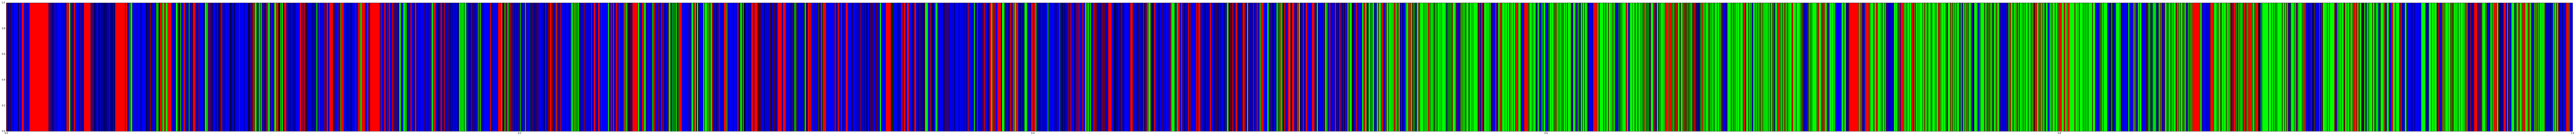

NC_004368.1 Streptococcus agalactiae NEM316, complete genome.


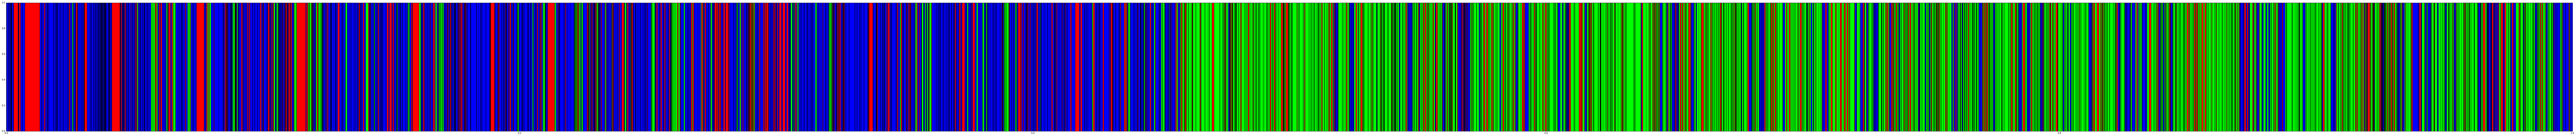

NC_004461.1 Staphylococcus epidermidis ATCC 12228, complete genome.


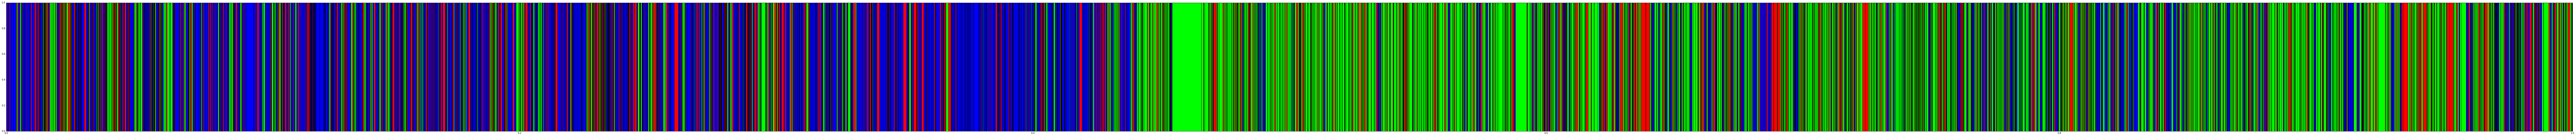

NC_006448.1 Streptococcus thermophilus LMG 18311, complete genome.


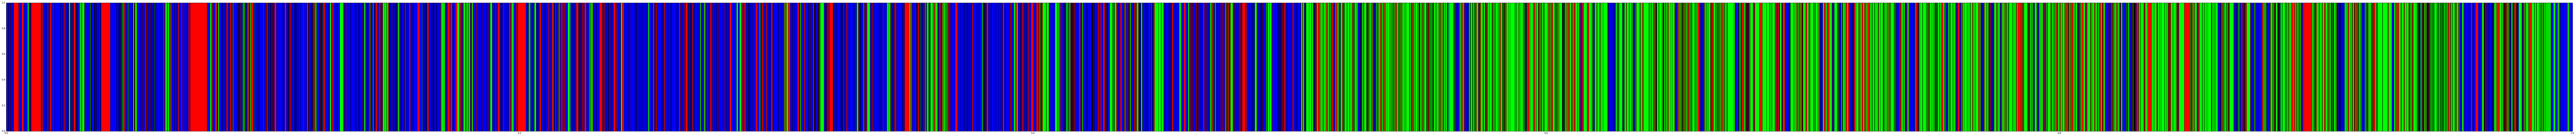

NC_007168.1 Staphylococcus haemolyticus JCSC1435, complete genome.


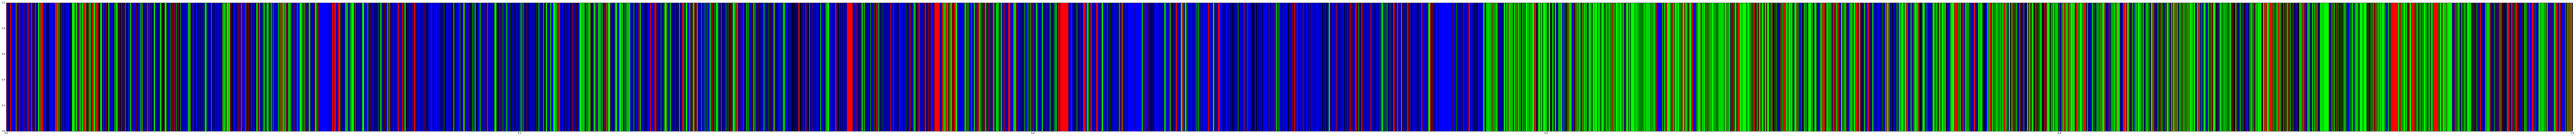

KeyError: '<'

In [13]:
all_vis(d)

In [4]:
## load all Data
def all_data(staph_url,staph_annot):
    d = {}
    for i in range(len(staph_url)):
        d[i] = [gh.load_file(staph_url[i]),gh.load_file(staph_annot[i])]
    return d

d = all_data(staph_url,staph_annot)
## Print all Data
def all_vis(d):
    for i in d.keys():
        regions = find_regions_df(annot,data)
        xranges,colors = plot_genome_input_data(regions)
        plot_genome(xranges,colors)
        plt.show()

NameError: name 'staph_url' is not defined

In [9]:
######################################################
## load genome annotation
annot = gh.load_file(staph_annot[0])
## load genome
data = gh.load_file(staph_url[0])

In [10]:
regions = find_regions_df(annot,data)

Built table of sequences for each state in genome...


/Users/ingrid/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


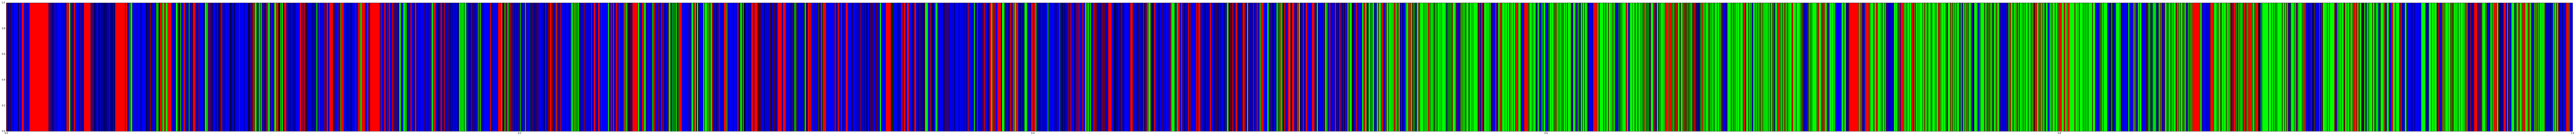

In [119]:
xranges,colors = plot_genome_input_data(regions)
plot_genome(xranges,colors)
title = ''.join(requests.get(url).text.split("\n")[0][1::])
# ax.title(title, loc='left')
plt.show()

## Visualize Prospective Vs Actual Genes

In [117]:
def split_into_frames2(starts,stops):
    """input: starts and stops are a list of indices
    where starts: (ATGs) or stops: (taa,tag,tga) where found in the genome.
    output: a list of tuples in the form of [...(start, stop, frame),...]"""
    res = []
    for i in range(3):
        s = np.array([-1] + [start for start in starts if (start - i) % 3 == 0])
        e = [end for end in stops if (end - i) % 3 == 0]
        indices = np.searchsorted(e,s)
        res += [(s[index],e[ind]+3,i) for index,ind in enumerate(indices[:-1])]
    return res

In [119]:
r_data = gh.reverse_complement(data)
starts,stops = gh.start_stops(r_data)
# frms = split_into_frames2(starts,stops)
pairs = [pair for pair in split_into_frames2(starts,stops) if pair[0] !=-1]
pairs = [pair for pair in pairs if pair[1] - pair[0] > 500]
pair_df = pd.DataFrame(pairs,columns=["start",'end','frame']).groupby(['end']).max().reset_index()
# i = 1
# res = []
# s = np.array([-1] + [start for start in starts if (start - i) % 3 == 0])
# e = [end for end in stops if (end - i) % 3 == 0]
# indices = np.searchsorted(e,s)
# res += [(s[index],e[ind]+3,i) for index,ind in enumerate(indices[:-1])]
# pairs = [pair for pair in split_into_frames2(starts,stops) ]
# R_pairs = gh.process_genome(r_data)

In [123]:
r_data[10928:11480]

'ATGATTGAACAAACACGTGAAATTGTGAGAAGTTTTAATCATACTTACCATACAGACTGTTTAGTAGAACCTGAAGGTATTTATCCAGAAAATGAAAAAGCTGGACGCTTACCTGGTCTTGATGGCAATGCCAAAATGTCTAAGTCATTGGGAAATGGAATCTATCTCTCAGATGATGCAGATACCGTTCGCAAAAAAGTGATGAGCATGTATACTGATCCAAATCATATTAAAATAGAAGATCCTGGTCAAATTGAAGGGAATATGGTCTTTCATTATTTGGATATTTTTGCTAGAAAAGAAGATCAAGCTGATATCGAAGCAATGAAAGAGCATTATCAAATAGGTGGTTTAGGAGATGTGAAAACGAAACGCTACCTTTTAGATATTTTAGAACGTGAATTAGCACCTATTCGTGAAAGACGTTTGGAGTACGCTAAAGATATGGGAGAGGTGTTCCGTATGTTACAAGAAGGTAGTCAAAAAGCAAGAACTGTGGCAGCCAAGACTTTATCAGAAGTGAAGTCAGCAATGGGTATTAATTATTTTTAA'

In [134]:
# e = rrr.end
# len(data)
# len(data) - e
# table.start = len(data) - e

In [145]:
def reverse_indices(table):
#     table.start = table.start(apply ind: len(data) - ind)
    new_start = len(r_data) - table.end
    new_end = len(r_data) - table.start
    table.start = new_start
    table.end = new_end
    return table


rrr = regions[regions.state == 'R']
Rs = reverse_indices(rrr)
Rs
# gh.reverse_complement(data[1806194:180731])
# regions[regions.state == 'R']
# ed = len(r_data) - 10928
# st = len(r_data) - 11480
# gh.reverse_complement(data[st:ed])
gh.reverse_complement(data[1742561:1743629])

'TGCCCAGATTCGCTATCAGTTTGAAAAGGCCGTTGCTTATCAAAAACAAGCCATTGCCTTGACCGAAAACAAGCCAGCTGAGTTATCGGCGAGTATTTTTTATATTGGATTAGGGATTTCCTACTTTTATTTAGCTGATTTTGAACAAGCTGAGCAAATCTTGAGTTTGGCTAAGGAAGCTTTGGTCAATCATAGTTATCCTTGGAAAGAAACGCAACTTGAAATTTACCTGGCTATGATTCAATGGAAAAAGGGCAATTATCAGCCAGCCTTGACCCTACTTGATTACAGAGAAACCTTGATGTCTAGGTATCGCAATCCGCGTGATAAGGGCTTGGTTTTCTATTTGATGGCTGTGGTCAAGTACCAATTGATATTTCAAGGAGCTACCCTAAGTCAGCAGGAAAAAGAAATGGCAGACCACCTGTTGTCAGAATCCTTTGAGTATTATTATGAGATTGCTAGTACTAACCTCAACCCTTACCGAGATTGTCATTTGGTGAGTGAGTTGAACGATTTGCGTCAACAATTATCTGCTAAAAGCTAAGGAAAACCCTCTGAAGTGAATCAGAGGGTTTTAGCTATGTTGTGCCATAATCTGTACGAGGTAAAAGATAAAGGTGGCTGCTAAATTGGCGGTGTGGTTATCAATATCGTGTGGTGGTGAAACCTCAACCACATCAAAGCCAACTAATTTTCCGCTAGCTGCAATGTGTTGCAAAACTAAGACGGCAAGATTTGGGTCAACACCGAGGGACTGGATAGCACTAACCCCAGGCGCAGCACCAACTGAGAAACAATCCATGTCAATGGTCAGGTAGACCCTTTCTTGCCCTTCTAAGAAACGGTCAATGGCTCGGCAGACCTTTTGATGGCCCATTTGGTAGATGTCTTGACCTGTTAAAAATTGAATGCCCTTGGATTTTGCCACAAAGTCAAATAGGAAAAGGTTGTTATTATGTTCTTGAATGCCTAAAACGAAGTATTTAAAGAGGCGTT

In [ ]:
regions

In [11]:
import warnings
warnings.filterwarnings('ignore')

F_pairs = gh.process_genome(data)
pair_df = pd.DataFrame(F_pairs,columns=["start",'end','frame']).groupby(['end']).max().reset_index()
print("Potential pairs found...")
print(len(pair_df))
print(pair_df.head())

##Sample from Actual Sequences and label as true
regions = find_regions_df(annot,data)
print("Regions Found..")
actual_forward_stops = regions[regions.state == 'C']
# actual_forward_stops["frame"] = actual_forward_stops.start.apply(lambda start: int(start) % 3)
actual_forward_stops["gene"] = True
print("Actual Stops")
print(actual_forward_stops.head())

##Merge actual and potential to create dataframe of both true and false sequences
merged_frames = pd.merge(pair_df,actual_forward_stops, on=["start",'end'],how='outer')
merged_frames.gene.fillna(False, inplace=True)
merged_frames.gene.value_counts()
print("Merged")
merged_frames = merged_frames[["end","start","gene"]]
print(merged_frames.sample(n=10))
print(merged_frames.gene.value_counts())

Potential pairs found...
706
    end  start  frame
0  1587    825      0
1  2878   2293      1
2  4595   3938      2
3  5234   4673      2
4  8740   8188      1
Regions Found..
Actual Stops
  state  start   end                                                seq  gene
1     C    231  1587  ATGACTGAAAATGAACAAATTTTTTGGAACAGGGTCTTGGAATTAG...  True
3     C   1741  2878  ATGATTCAATTTTCAATTAATCGCACATTATTTATTCATGCTTTAA...  True
5     C   2952  3150  ATGTATCAAATTGGATCATTTGTTGAAATGAAAAAACCTCATGCTT...  True
7     C   3479  4595  ATGGCTTTAACAGCAGGTATTGTAGGCTTACCAAATGTTGGTAAAT...  True
9     C   4664  5234  ATGGTAAAAATGATTGTTGGTCTGGGAAATCCAGGCTCTAAATATG...  True
Merged
          end    start   gene
950    415594   414595   True
802    162324   161838   True
1358  1607639  1607351   True
195    358869   358332  False
640   1552792  1552201  False
1335  1444847  1443569   True
11      32957    32435  False
1333  1442705  1441793   True
905    340210   339817   True
1210   865483   865045   True
True 

In [146]:
def plot_genome_input_data2(regions,data):
    colors = {False:(0,.3,.7),True:(1,.9,.5)}
    df = pd.DataFrame()
    df['start'] = regions.start / len(data)
    df['width'] = (regions.end - regions.start) / len(data)
    df['color'] = regions.gene.apply(lambda x: colors[x])
    df['xrange'] = df.apply(lambda x: (x[0],x[1]),axis=1)
    xranges = list(df.xrange)
    colors = list(df.color)
    return [xranges, colors]

def plot_genome2(xranges,colors):
    yrange = (0,1)
    coll = BrokenBarHCollection(xranges, yrange, facecolors=colors)
    coll.set_alpha(alpha=1)
    coll.set_edgecolor((1,1,1))
    fig, ax = plt.subplots(figsize=(200, 10), dpi=100)
    ax.add_collection(coll)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))

In [147]:
xranges,colors = plot_genome_input_data2(merged_frames,data)

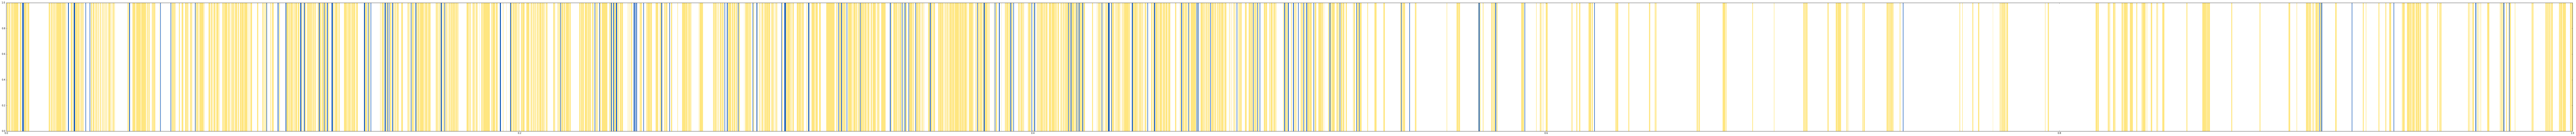

In [148]:
plot_genome2(xranges,colors)
plt.show()

In [149]:
## Pairplots
import genome_helpers as ge
import load_genomes 
import pickle

def pickle_save(filename, variable):
    filename = filename+'.pkl'
    output = open(filename, 'wb')
    pickle.dump(variable, output)
    output.close()
    print(filename + " Saved!")
    return True

def pickle_open(filename, df=False):
    """Eventually check if we are opening a python 3 or python 2 file 
    and deal with discrepencies (python 3 pickle opened in python 2 etc...)"""
    if df == True:
        file = pd.read_pickle(filename)
        print(filename + " dataframe sucessfully loaded!")
    else:
        file = pickle.load( open( filename, "rb" ) )
        print(filename + " sucessfully loaded!")
    return file

de = pickle_open('genome_dictionary.pkl.pkl')
r_pairs = pickle_open('r_pairs.pkl')
f_pairs = pickle_open('f_pairs.pkl')

def addSequence(d):
    for i,pair in enumerate(f_pairs):
        
        pair["seq"] = pair.apply(lambda x: d[i][0][int(x[1]):int(x[0])],axis=1)
        pair["predicted"] = True
    for i,pair in enumerate(r_pairs):
        rd = ge.reverse_complement(d[i][0])
        pair["seq"] = pair.apply(lambda x: rd[int(x[1]):int(x[0])],axis=1)
        pair["predicted"] = True

addSequence(de)
x = pickle_open('all_frequency_data_X.pkl')
y = pickle_open('all_frequency_data_Y.pkl')

forwards = pickle_open('all_forward_mergers.pkl')
reverses = pickle_open('all_reverse_mergers.pkl')


genome_dictionary.pkl.pkl sucessfully loaded!
r_pairs.pkl sucessfully loaded!
f_pairs.pkl sucessfully loaded!
all_frequency_data_X.pkl sucessfully loaded!
all_frequency_data_Y.pkl sucessfully loaded!
all_forward_mergers.pkl sucessfully loaded!
all_reverse_mergers.pkl sucessfully loaded!


,end,start_x,frame,genome,seq,predicted,start_y,gene
0,1587,825,0,0,ATGGATGAATTGAAAGAAAAATTTCGTAATTTAGATTTACTCCTTA...,True,231,True
1,2878,2293,1,0,ATGAGCCAACGTTTAATCACTTTGGACAATACTTCAGCAGATTTTG...,True,1741,True
2,4595,3938,2,0,ATGGCACGAACTCAAAAAGATAAAGAATCAGTAGCAGAGTTTAATG...,True,3479,True
3,5234,4673,2,0,ATGATTGTTGGTCTGGGAAATCCAGGCTCTAAATATGAAAAAACAA...,True,4664,True
4,8740,8188,1,0,ATGTATTCTCAGTTATTGGAACAGGCTATTGCTAGCAAGCAGGGAA...,True,5236,True
5,10954,10345,1,0,ATGTATGCTGCAAGTATCTCGAAGTTAGCACCACTTTATATTGTTC...,True,9667,True
6,12237,11340,0,0,ATGAGGCTAATTAGAGGAAGCCGATTGAGGCACTTGTCGGGTATAA...,True,NaN,False
7,12784,12241,1,0,ATGCTCGAGCAAGATATTCAAAAAATTCTTTACTCTGAAAATGATA...,True,NaN,False
8,14785,14272,1,0,ATGCTTCTTTCTAAAGAAGATCTGAAAGAGCAATTAGCAGGATTGA...,True,12805,True
9,16501,15829,1,0,ATGGCAGTTGATGAAGTGAAAGAACCACAAAAAACAATCCCTAAAG...,True,15109,True
